<h1>Sandra Field </h1>
MSDS 432, Dr Ali <br>
Spring 2021
<h2>Hash Tables</h2><br>

In [1]:
import math
from scipy import stats
import numpy as np
import pandas as pd
import time
import random, string
from time import perf_counter, perf_counter_ns
from random import shuffle, seed
#from random import seed
#from random import random

#Graphics
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
sns.set_style('white')
style.use('seaborn-poster')

<h1>Create Datasets</h1>

In [2]:
np.random.seed(4422)


names = list()    # holds a list of 100,000 name charstrings 
N = 10     #desired length of name

def namegen(str_size=N):
    allowed_chars = string.ascii_letters # options: + string.punctuation + string.digits
    name = list() # holds the string of 10 chars
    name = ''.join(random.choices(allowed_chars, k=str_size))
    return name #return only strings with 10 unique chars

def namelist(num_names=100000):
    for i in range(num_names):
        names.append(namegen())
    return names

In [3]:
names_unsorted = namelist()  #generate 100000 unsorted names
len(names_unsorted)

100000

In [4]:
#Test for duplicates by comparing lengths of string generated vs
# string with no duplicates. "True" means there are no duplicates

[len(names) == len(set(names))]  

[True]

In [5]:
names_set = set(names_unsorted)

In [6]:
n=[]
for i in range(1,10,2):
    picknum = ((10000*i)-1)
    n.append(names_unsorted[picknum])
    print("String number ", (picknum+1), " is: ", names_unsorted[picknum])
picknum=100000-1
n.append(names_unsorted[picknum])
print("String number ", (picknum+1), " is: ", names_unsorted[picknum])
#print("\n\nAll strings: \n\n",n)

String number  10000  is:  jFyZhkUxlL
String number  30000  is:  FtJtedIjzv
String number  50000  is:  VJRHapGZvn
String number  70000  is:  XyradnjysH
String number  90000  is:  HKnEJyspiO
String number  100000  is:  goTCZqHVUN


<h1>Search Algorithms</h1>

In [7]:
#Binary search algorithm
def binary_search(mylist, item):
    low_idx = 0
    high_idx = len(mylist) - 1

    counter = 0

    while low_idx <= high_idx:
        # ... check the middle element
        mid_idx = (low_idx + high_idx) // 2
        guess = mylist[mid_idx]

        counter = counter + 1

        # Found the item.
        if guess == item:
            return mid_idx
        # The guess was too high.
        if guess > item:
            high_idx = mid_idx - 1
        # The guess was too low.
        else:
            low_idx = mid_idx + 1
    return None

#Linear search algorithm
def linear_search(mylist, item):
    i = 0
    while i < len(mylist):
        if mylist[i] == item:
            return i
        else:
            i = i + 1
    return None

<h1>Time Tracking Function</h1>

In [8]:
#A time tracking function

def elapsed(func):
    time_start = perf_counter_ns()
    func()
    time_stop = perf_counter_ns()
    return ((time_stop - time_start) / 1000000) #convert from ns to ms

<h1>Sort Dataset - Quicksort</h1><br>
Quicksort is chosen, because due to it's divide and conquer strategy, it is one of the fastest sort algorithms.  It's chosen over merge sort, another very fast algorithm, because quicksort has a smaller constant than merge sort.  The constant C is the fixed amount of time that the algorithm takes.  Even though sometimes quicksort is O(n^2) time in the worst case scenerio, it is faster in larger random datasets which are normally distributed.  Here, the average case happens most often and the time will be O(n log n) time.<br>

Quicksort:<br>
-In the worst case, quicksort takes O(n^2) time.
-In the average case, quicksort takes O(n log n) time.

In [9]:
# Quicksort O(N**2) 
def quickSort(array):
    if len(array) < 2:
        # base case, arrays with 0 or 1 elements are already sorted.
        return array
    else:
        # recursive case
        pivot = array[0]
        # sub-array of all elements less than the pivot
        less = [i for i in array[1:] if i <= pivot]
        # sub-array of all elements greather than the pivot
        greater = [i for i in array[1:] if i >= pivot]
        return quickSort(less) + [pivot] + quickSort(greater)

In [10]:
#Time the creation of sorted variable
time_start = perf_counter_ns()
names_sorted = quickSort(names_unsorted)
time_stop = perf_counter_ns()
sort_time =  ((time_stop - time_start) / 1000000) #convert from ns to ms


<h1>Search Dataset for Specific Strings</h1>

In [12]:
results = pd.DataFrame(columns = ['String Location', 'Linear Search (ms)', 'Binary Search (ms)','set.remove (ms)','QuickSort (ms)'])

In [13]:
lint, bint, sett, j = [0]*4 #initialize tracker vars
locations = [10000, 30000, 50000, 70000, 90000, 100000]
for i in n:
    
    # Linear Search for unsorted list    
    lint = elapsed(lambda: linear_search(names_unsorted, i))
    
    # Binary search for sorted list
    bint = elapsed(lambda: binary_search(names_sorted, i))
    
    # Set.remove() for set
    sett = elapsed(lambda: names_set.remove(i))
    
    results.loc[i] = [locations[j], lint, bint, sett, sort_time]
    j+=1


In [14]:
results

,String Location,Linear Search (ms),Binary Search (ms),set.remove (ms),QuickSort (ms)
jFyZhkUxlL,10000.0,1.2032,0.0078,0.0017,266.5707
FtJtedIjzv,30000.0,3.8587,0.0080,0.0013,266.5707
VJRHapGZvn,50000.0,6.4986,0.0087,0.0013,266.5707
XyradnjysH,70000.0,8.0964,0.0075,0.0008,266.5707
HKnEJyspiO,90000.0,10.5088,0.0059,0.0009,266.5707
goTCZqHVUN,100000.0,11.7393,0.0068,0.0009,266.5707


In [15]:
results.set_index=results['String Location']

<h1>Results</h1>

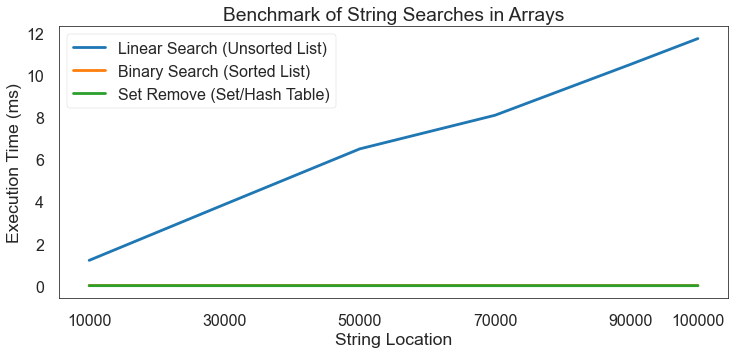

In [24]:
sns.despine()
ax = sns.lineplot(x='String Location', y='Linear Search (ms)', data=results)
ax = sns.lineplot(x='String Location', y='Binary Search (ms)', data=results)
ax = sns.lineplot(x='String Location', y='set.remove (ms)', data=results)
ax.legend(['Linear Search (Unsorted List)','Binary Search (Sorted List)','Set Remove (Set/Hash Table)'])

plt.title('Benchmark of String Searches in Arrays')
plt.xlabel('String Location')
plt.ylabel('Execution Time (ms)')
plt.xticks(locations)
plt.show()

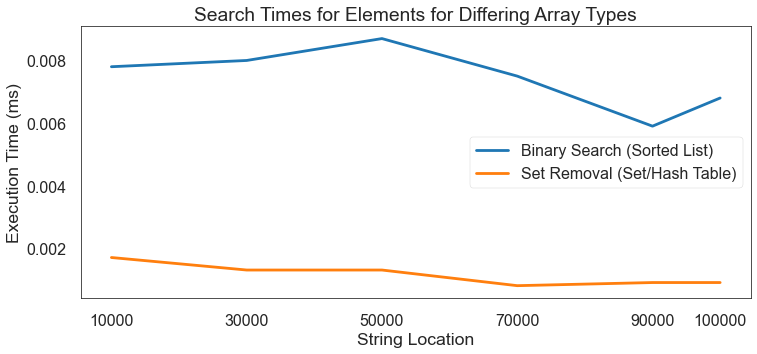

In [25]:
ax = sns.lineplot(x='String Location', y='Binary Search (ms)', data=results)
ax = sns.lineplot(x='String Location', y='set.remove (ms)', data=results)
ax.legend(['Binary Search (Sorted List)','Set Removal (Set/Hash Table)'])

plt.title('Search Times for Elements for Differing Array Types')
plt.xlabel('String Location')
plt.ylabel('Execution Time (ms)')
plt.xticks(locations)
plt.show()

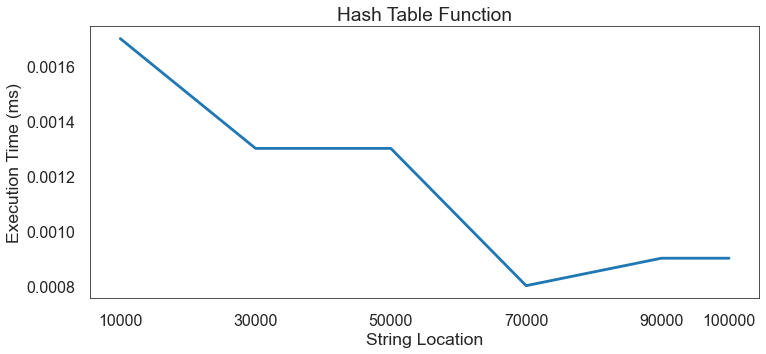

In [26]:
ax = sns.lineplot(x='String Location', y='set.remove (ms)', data=results)
plt.title("Hash Table Function")
plt.xlabel('String Location')
plt.ylabel('Execution Time (ms)')
plt.xticks(locations)
plt.show()

<h1>Summary</h1>

<p>
Hash tables can be created by combining a hash function with an array, and map strings or a sequence of bytes to a number.  They're extremely quick at performing searches, inserts, and deletes.  They're dependable because they consistently map a name to the same index, its always a valid index, and there is only one index per string (no duplicates).</p>
<p>
Hash tables are great for things like phone books, contact lists, DNS resolution, and caching.  Care must be taken to ensure the table is big enough for the data contained within it to prevent collisions, because those will reduce or destroy the integrity of the hash table.  A hash table must never have a load factor of more than 0.7% or it needs to be resized.  Load factor = # items in hash table / total # of slots.  </p>

<p>
As long as there are no collisions, a hash table can provide O(1) time, or constant time.  The time taken will stay the same regardless of how big the hash table is.  So, eventually it can beat any search/sort algorithm as table size grows, because size and sort-status does NOT effect hash tables even though it effects sorts and searches.</p>

  
<p>
<b>Average Times: </b><br>
Linear searches (simple searches) are O(n), "linear time",<br>
Binary searhces are O(log n), "log time",<br>
Hash Tables are O(1) as long as there are no collisions.</p>
